# Machine Learning Project
## Campus Placement classification project using KNN
## Name : Chinmay Holkar
## Branch : Mechanical Engineering
## College : COEP

### The data used for this Campus Placement classification using KNN algorithm was taken from Kaggle.com 

The dataset consists of the following independent parameters:
1. ssc_p - the ssc board percentage of a student(10 th board)
2. hsc_p - the hsc board percentage of a student(12 th board)
3. ssc_b - the board of education - Central/Others
4. hsc_b - the board of education - Central/Others
5. gender- Gender - 'M' for male , 'F' for female
6. hsc_s - specialization in hsc 
7. degree_p - Degree percentage
8. degree_t - Under graduate(Degree type) 
9. workex - Work Experience
10. etest_p - Employability test percentage
11. specialization - Post Graduation(MBA)
12. mba_p - MBA percentage
13. status - Status of placement - Placed/Not Placed 
14. salary - Salary offered by the corporate to candidates

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Step 1 : Importing the data.

In [33]:
# Creating the dataframe.
df1 = pd.read_csv('Placement_Data_Full_Class.csv')
df1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Step 2 : Filtering the data

In [3]:
# Describing the shape of the dataframe
df1.shape

(215, 15)

In [36]:
df1.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### We can clearly see from the above description that only 'salary' is the nominal variable that has a count of 148 means it consists of some missing values which is given by 'NaN' for the Non placed students. The overall placement percentage is 68.83%.

In [37]:
df1.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [41]:
# Converting all the categorical variables into the dummy variables 
df = df1
df = pd.get_dummies(df,columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'])
df['Placement_status'] = df.status.map({'Placed':1, 'Not Placed':0})
df = df.drop('status',axis=1)
df.dtypes

sl_no                       int64
ssc_p                     float64
hsc_p                     float64
degree_p                  float64
etest_p                   float64
mba_p                     float64
salary                    float64
gender_F                    uint8
gender_M                    uint8
ssc_b_Central               uint8
ssc_b_Others                uint8
hsc_b_Central               uint8
hsc_b_Others                uint8
hsc_s_Arts                  uint8
hsc_s_Commerce              uint8
hsc_s_Science               uint8
degree_t_Comm&Mgmt          uint8
degree_t_Others             uint8
degree_t_Sci&Tech           uint8
workex_No                   uint8
workex_Yes                  uint8
specialisation_Mkt&Fin      uint8
specialisation_Mkt&HR       uint8
Placement_status            int64
dtype: object

## Step 3 : Data Visualization
## Visualizing the placed and unplaced students wrt various independent parameters.

### 1 . No of count of placed and the unplaced students

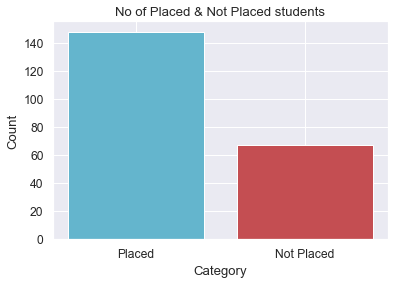

In [32]:
name = df1['status'].unique()
size = df1.groupby(df1['status'],sort=False).size()
plt.bar(name,size,color=['c','r'])
plt.title('No of Placed & Not Placed students')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### Conclusions:
### No of placed students are 148 and unplaced students are 67

### 2. Plot between SSC and HSC for the placed and unplaced students

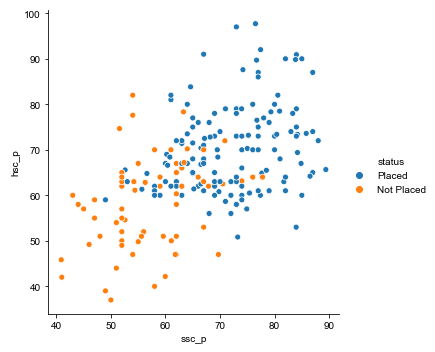

In [9]:
# Using the seaborn library to plot the effect of two parameters in getting a job.
sns.relplot(x='ssc_p',y='hsc_p',hue='status',data = df1)
sns.set(font_scale=0.9) #for label size

### Conclusions:
### If you have a percentage greater than 60% in both hsc and ssc exams the chances of getting placed are high.

### 3. Plot between degree and MBA percentage

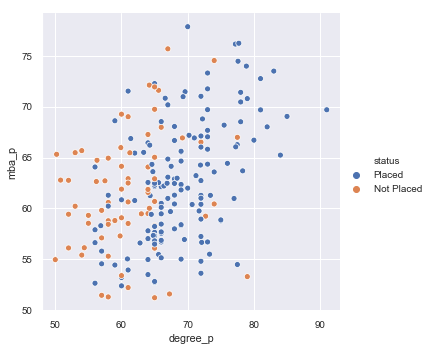

In [10]:
sns.relplot(x='degree_p',y='mba_p',hue='status',data = df1)

### Conclusions:
### If you have the degree_percentage greater than 60% and mba percentage greater than 55% then chances of getting placed are high

 ### 4. Plot between employability test and mba percentage and status

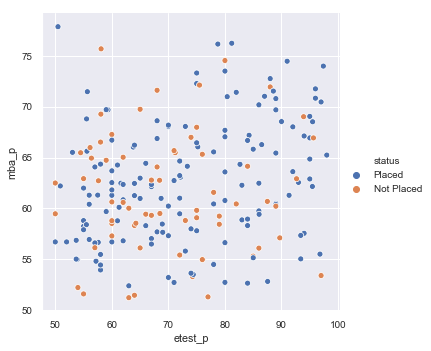

In [11]:
sns.relplot(x='etest_p',y='mba_p',hue='status',data = df1)


### Conclusions:
### If your mba percentage is between 55% to 65% and have employability test percentage between 55% to 90% then chances are similar or just better to be placed than unplaced. If mba percentage is greater than 65% and etest scores are greater than 80% then chances of getting placed are high enough.

### 5. Plot between ssc_b and status and salary

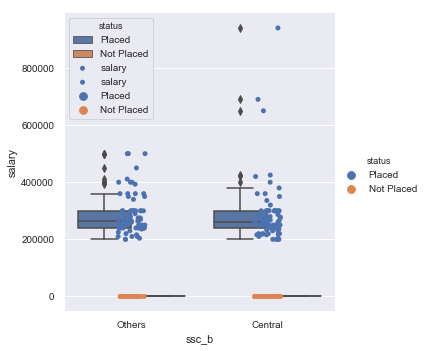

In [12]:
sns.catplot(x='ssc_b',y='salary',hue='status',data=df1)
sns.boxplot(x = 'ssc_b',y='salary',hue='status',data=df1)

### Conclusions:
### 1. Students belonging to both central board and other boards have much similar average salaries.
### 2. The exceptional students of the central board are receiving greater salaries as compared to the exceptional students of the other boards category.

### 6. Plot between hsc_b and status and salary

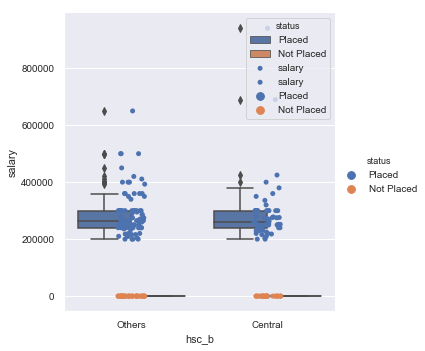

In [13]:
sns.catplot(x='hsc_b',y='salary',hue='status',data=df1)
sns.boxplot(x='hsc_b',y='salary',hue='status',data=df1)

### Conclusions:
### 1. Same conclusions for hsc board students as it is for ssc board.

### 7. Plot between hsc_s and status and salary

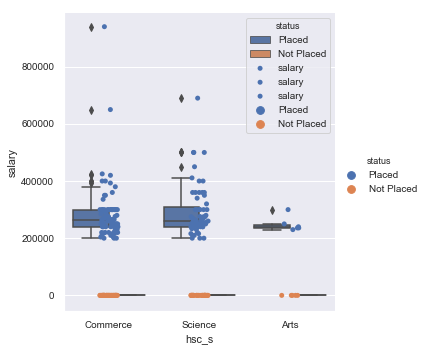

In [14]:
sns.catplot(x='hsc_s',y='salary',hue='status',data=df1)
sns.boxplot(x='hsc_s',y='salary',hue='status',data=df1)

### Conclusions:
### 1. Belonging to science stream is an advantage to be  more likely to get placed than commerce.
### 2. Incase of the art stream , placement chances are quiet less.
### 3. If you belong commerce stream and are exceptionally good at it, you may receive a highest package 

### 8. Plot between degree specialization and status and salary

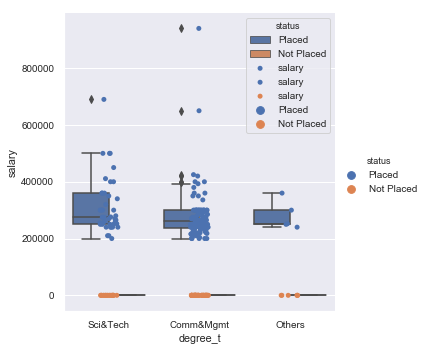

In [15]:
sns.catplot(x='degree_t',y='salary',hue='status',data=df1)
sns.boxplot(x='degree_t',y='salary',hue='status',data=df1)

### Conclusions:
### 1. Science and technology specialization does give a greater range of package during placement .
### 2. Commerce and Management limits the range of package , but exceptionally good students receive the highest possible package.
### 3. Other have very much limited and very poor scope of placement in comparison to the above two specializations. 

### 9. Plot between work experience and status and salary

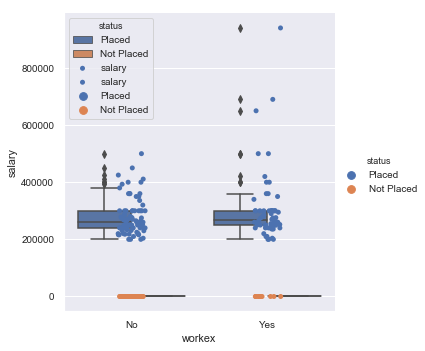

In [16]:
sns.catplot(x='workex',y='salary',hue='status',data=df1)
sns.boxplot(x='workex',y='salary',hue='status',data=df1)

### Conclusions:
### 1. Average package is nearly same for both students with or without work experience.
### 2. Incase of highest placement package work experience does matter. 

### 10 . Plot between specialization and status and salary

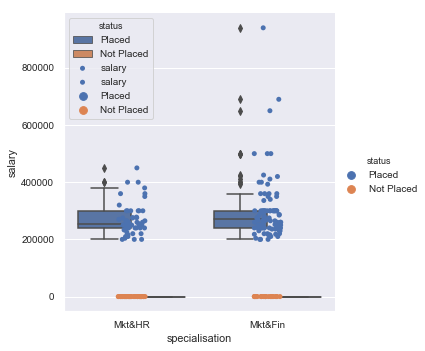

In [17]:
sns.catplot(x='specialisation',y='salary',hue='status',data=df1)
sns.boxplot(x='specialisation',y='salary',hue='status',data=df1)

### Conclusions:
### 1. Marketing and finance specialization have higher average package than Marketing and HR specialization.
### 2. Also the students getting package more than 4 lacs is more in case of Marketing and Finance than incase of marketing and HR.

## Step 4: Dividing into input and output

In [18]:
# dividing into input and output
x = df.drop(['Placement_status','salary'],axis=1)
y = df['Placement_status']
# converting into float datatype all the input data so as to min max scale data
x = x.astype(np.float64)
x = np.array(x)
y = np.array(y)



## Step 5: Train and test split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)
print(x_train.shape)
print(x_test.shape)
y_train


(144, 22)
(71, 22)


array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Step 6 : Normalization 

In [20]:
scaler = MinMaxScaler()
print(scaler.fit(x_train))
x_train_std = scaler.transform(x_train)
print(scaler.fit(x_test))
x_test_std = scaler.transform(x_test)
x_test_std

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


array([[0.93719807, 0.53823954, 0.50126035, ..., 0.        , 0.        ,
        1.        ],
       [0.15942029, 0.78561121, 0.6092906 , ..., 0.        , 0.        ,
        1.        ],
       [0.41062802, 0.88868275, 0.59128556, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.12560386, 0.47639662, 0.564278  , ..., 0.        , 0.        ,
        1.        ],
       [0.2705314 , 0.68253968, 0.50126035, ..., 1.        , 1.        ,
        0.        ],
       [0.25120773, 0.45578231, 0.52646741, ..., 0.        , 1.        ,
        0.        ]])

## Step 7 & 8 : Running a classifier and fitting the model (without normalization)

In [21]:
# no of neighbors = square root of the no of datapoints in the train dataset 
import math
a = x_train.shape[0]
sq_rt = int(math.sqrt(a))
classifier=KNeighborsClassifier(n_neighbors=sq_rt,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

## Step 9 : Predicting the output (without normalization)

In [45]:
y_pred = classifier.predict(x_test)
print(y_pred)
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]


## Step 10 : Accuracy Score and Confusion Matrix (without normalization)

In [46]:
acc = accuracy_score(y_pred,y_test)*100
acc

70.4225352112676

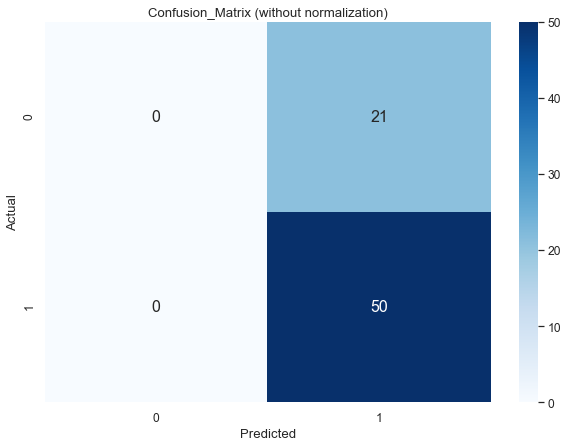

In [47]:
data_1 = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data_1,columns = np.unique(y_test),index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title("Confusion_Matrix (without normalization)")
sns.set(font_scale=1.1) #for label size
sns.heatmap(df_cm, cmap="Blues",annot=True,annot_kws={"size":16})#font size

## Step 7 & 8 : Running the classifer and fitting the model (with normalization)

In [25]:
# After normalization
classifier.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

## Step 9: Predicting the output (with normalization)

In [26]:
y_pred = classifier.predict(x_test_std)
print(y_pred)
print(y_test)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1]
[0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]


## Step 10 : Accuracy Score and Confusion Matrix (with normalization)

In [27]:
acc = accuracy_score(y_test,y_pred)*100
acc

81.69014084507043

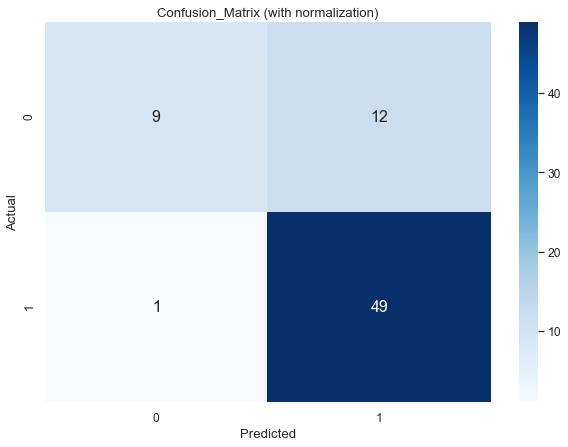

In [28]:
data_1 = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data_1,columns = np.unique(y_test),index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title("Confusion_Matrix (with normalization)")
sns.set(font_scale=1.1) #for label size
sns.heatmap(df_cm, cmap="Blues",annot=True,annot_kws={"size":16})#font size

## Additional Step : Plotting accuracy v/s no of neighbors

12

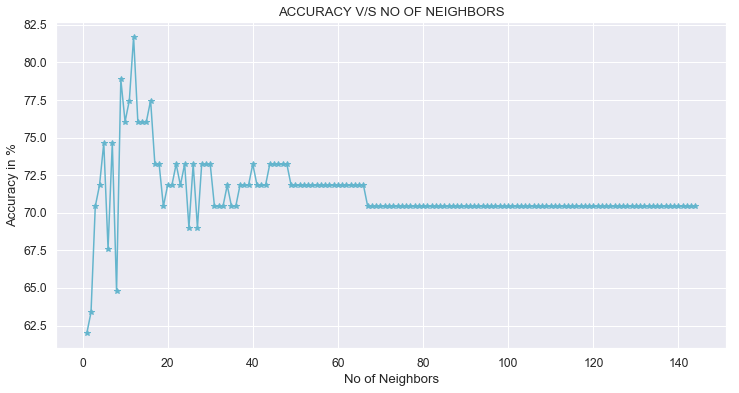

In [50]:
import math
plt.figure(figsize=(12,6))
a = x_train_std.shape[0]
sq_rt = int(math.sqrt(a))
i = 1
acc = np.array([])
k = np.array([])
while i <= a:
    classifier=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    classifier.fit(x_train_std,y_train)
    y_pred = classifier.predict(x_test_std)
    acc = np.append(acc,accuracy_score(y_test,y_pred)*100)
    k = np.append(k,i)
    i = i + 1
plt.plot(k,acc,marker='*',c='c')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy in %')
plt.title('ACCURACY V/S NO OF NEIGHBORS')
sq_rt